In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [3]:
#load in average readmissions data and read
average_readmission_clean_csv = Path("Output/Average_Readmission_Clean.csv")
average_readmission_clean = pd.read_csv(average_readmission_clean_csv)
average_readmission_clean

,state,Race,% Readmission
0,ALABAMA,American Indian/Alaska native,15.767442
1,ALABAMA,Asian/Pacific islander,15.480000
2,ALABAMA,Black,15.403689
3,ALABAMA,Hispanic,15.300654
4,ALABAMA,Other,15.555556
...,...,...,...
303,WYOMING,Asian/Pacific islander,15.181818
304,WYOMING,Black,15.000000
305,WYOMING,Hispanic,14.988764
306,WYOMING,Other,15.062500


In [4]:
#convert to dataframe
average_readmission_clean_df = pd.DataFrame(average_readmission_clean)
#find average readmission rate per state --- so we can find top 5 states and bottom 5 states (%readmisson)
avg_readmissions_by_state = average_readmission_clean_df.groupby('state')['% Readmission'].mean()
avg_read_state_df = pd.DataFrame(avg_readmissions_by_state)
avg_read_state_df.head(10)

,% Readmission
state,
ALABAMA,15.478021
ALASKA,14.172724
ARIZONA,15.015916
ARKANSAS,15.829309
CALIFORNIA,15.387323
COLORADO,14.612978
CONNECTICUT,16.042437
DELAWARE,15.629630
DISTRICT OF COLUMBIA,16.743056


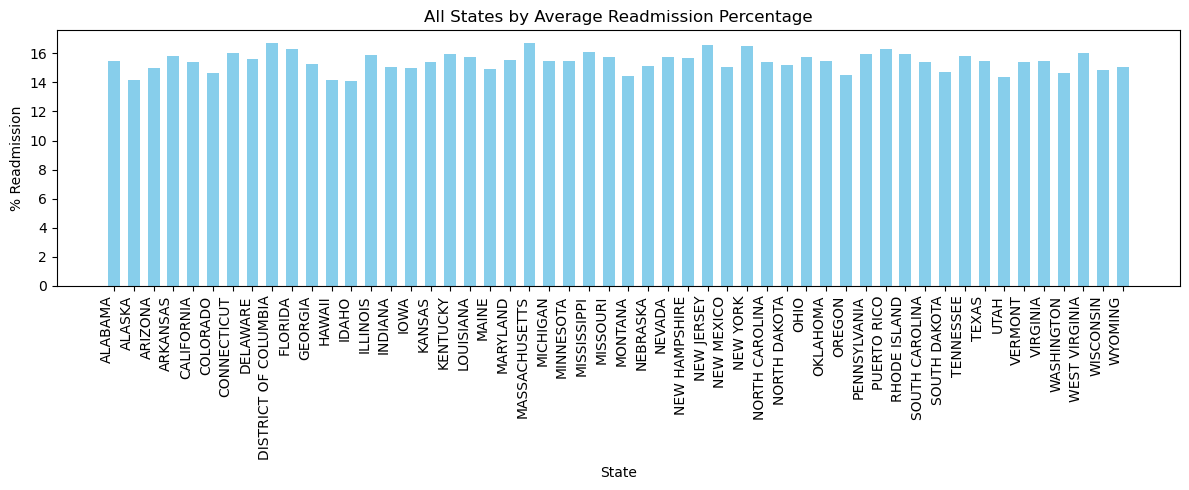

In [5]:
plt.figure(figsize=(12, 5))
plt.bar(avg_read_state_df.index, avg_read_state_df['% Readmission'], color='skyblue', width=0.6)
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('All States by Average Readmission Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [6]:
#Get top 5 states by %Readmission
top_sorted_states = avg_readmissions_by_state.sort_values(ascending=False)
# Get the top 5 states
top_4_states = top_sorted_states.head(4)
top_4_states_df = pd.DataFrame(top_4_states)
top_4_states_df

,% Readmission
state,
DISTRICT OF COLUMBIA,16.743056
MASSACHUSETTS,16.706773
NEW JERSEY,16.568565
NEW YORK,16.498212


In [7]:
#Get bottom 5 states by %Readmission
bottom_sorted_states = avg_readmissions_by_state.sort_values(ascending=True)
# Get the bottom 5 states
bottom_4_states = bottom_sorted_states.head(4)
bottom_4_states_df = pd.DataFrame(bottom_4_states)
bottom_4_states_df

,% Readmission
state,
IDAHO,14.127872
HAWAII,14.171429
ALASKA,14.172724
UTAH,14.367306


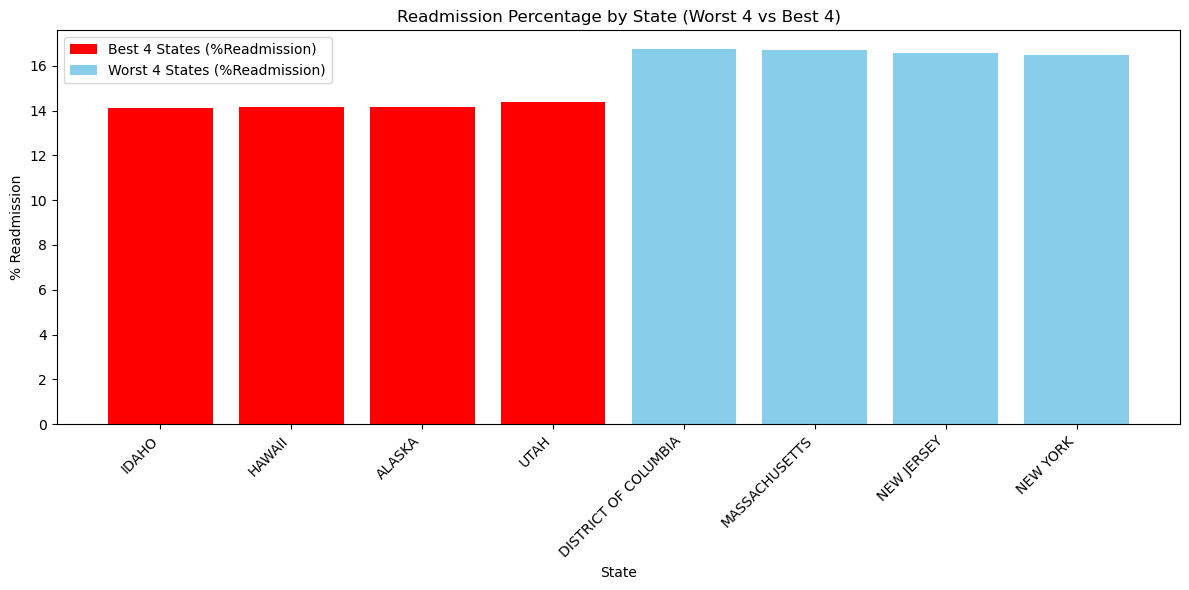

In [8]:
plt.figure(figsize=(12, 6))

# Plot bottom_5 data with green bars
plt.bar(bottom_4_states_df.index, bottom_4_states_df['% Readmission'], color='red', width=0.8, label='Best 4 States (%Readmission)')

# Plot top_5 data with blue bars
plt.bar(top_4_states_df.index, top_4_states_df['% Readmission'], color='skyblue', width=0.8, label='Worst 4 States (%Readmission)')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by State (Worst 4 vs Best 4)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Show legend with labels for each set of bars
plt.tight_layout()
plt.show()

In [9]:
bottom_4_states = ['IDAHO', 'HAWAII', 'ALASKA', 'UTAH']

filtered_df1 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(bottom_4_states)]
filtered_df1

,state,Race,% Readmission
6,ALASKA,American Indian/Alaska native,15.000000
7,ALASKA,Asian/Pacific islander,14.173913
8,ALASKA,Black,14.000000
9,ALASKA,Hispanic,13.925926
10,ALASKA,Other,13.333333
11,ALASKA,White,14.603175
66,HAWAII,American Indian/Alaska native,13.600000
67,HAWAII,Asian/Pacific islander,14.277778
68,HAWAII,Black,14.095238
69,HAWAII,Hispanic,14.333333


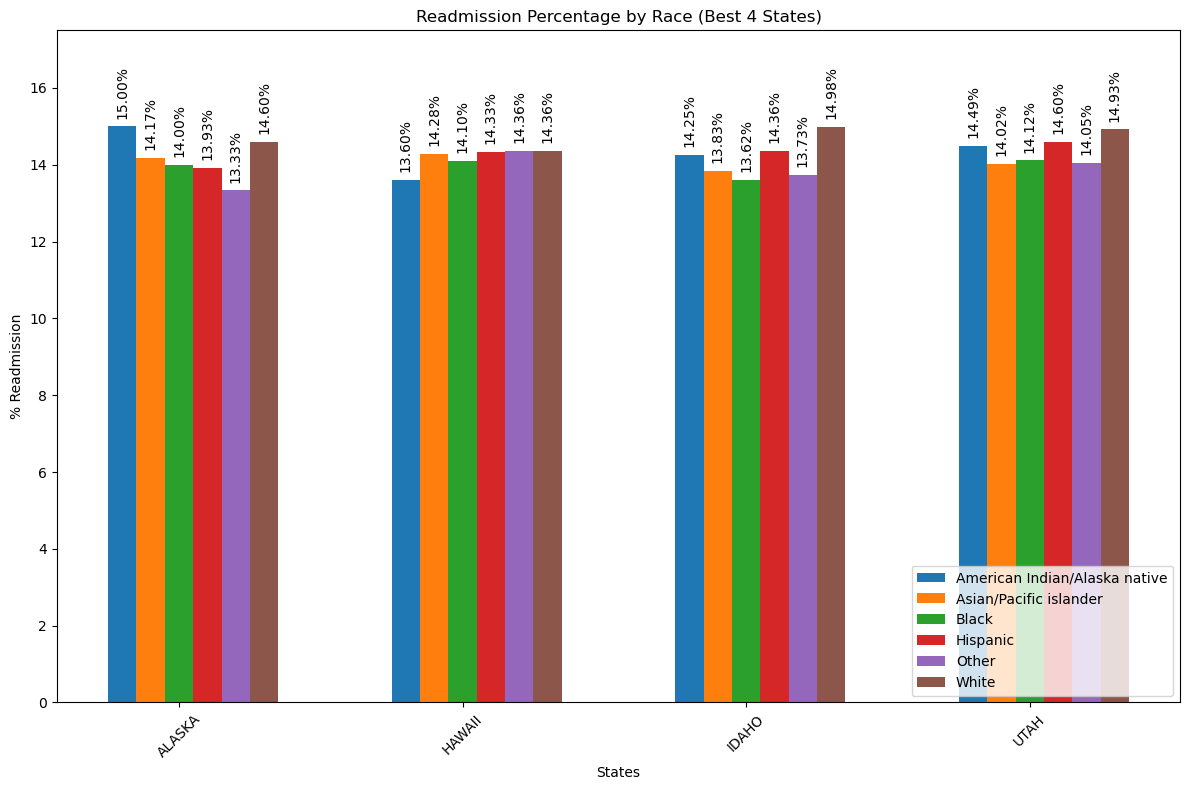

In [10]:
states = filtered_df1['state'].unique()
races = filtered_df1['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df1.groupby(['state', 'Race']).mean().reset_index()

# Create the chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Best 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 17.5)
plt.tight_layout()
plt.show()

In [11]:
top_4_states = ['DISTRICT OF COLUMBIA', 'MASSACHUSETTS', 'NEW JERSEY', 'NEW YORK']

filtered_df2 = average_readmission_clean_df[average_readmission_clean_df['state'].str.upper().isin(top_4_states)]
filtered_df2

,state,Race,% Readmission
48,DISTRICT OF COLUMBIA,American Indian/Alaska native,17.125000
49,DISTRICT OF COLUMBIA,Asian/Pacific islander,16.777778
50,DISTRICT OF COLUMBIA,Black,16.777778
51,DISTRICT OF COLUMBIA,Hispanic,16.777778
52,DISTRICT OF COLUMBIA,Other,16.555556
53,DISTRICT OF COLUMBIA,White,16.444444
126,MASSACHUSETTS,American Indian/Alaska native,16.860000
127,MASSACHUSETTS,Asian/Pacific islander,16.765306
128,MASSACHUSETTS,Black,16.628319
129,MASSACHUSETTS,Hispanic,16.697248


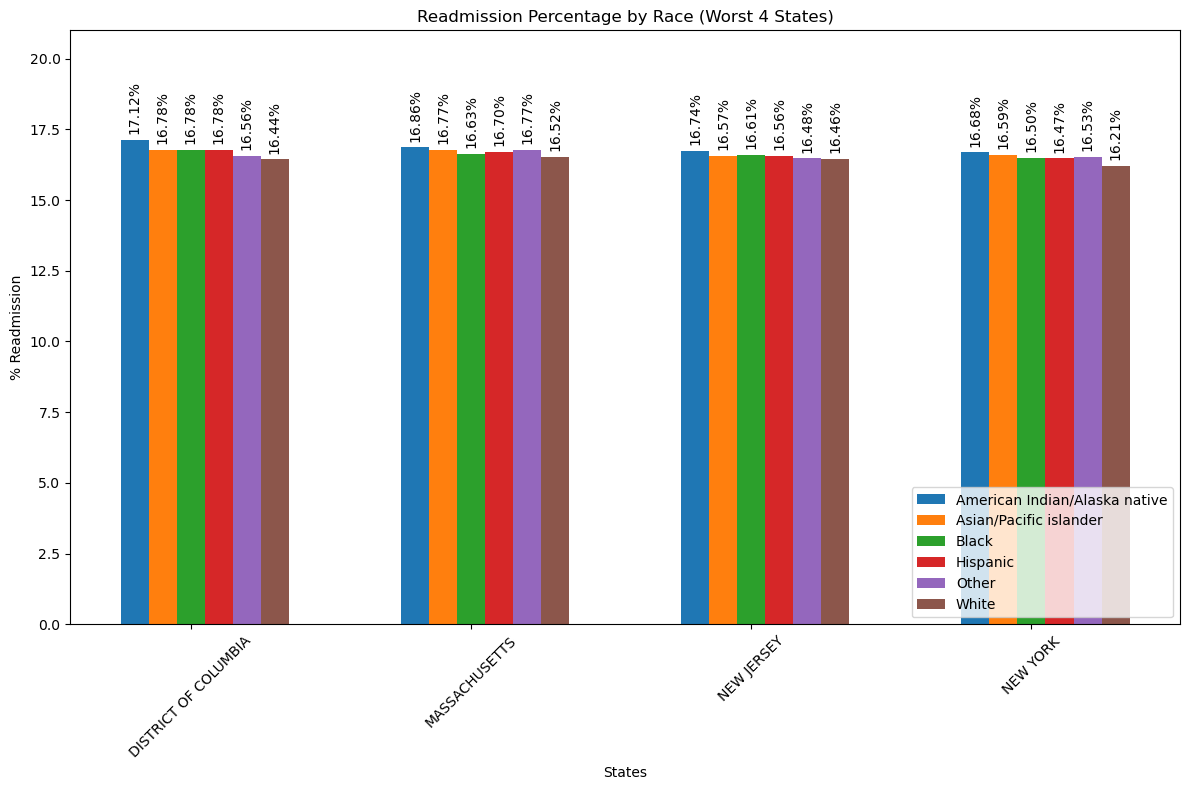

In [12]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group the dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

# Create bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.1
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    plt.bar([p + i * bar_width for p in index], race_data['% Readmission'], bar_width, label=race, color=colors[i])
    # Add labels on top each bar
    for j, percentage in enumerate(race_data['% Readmission']):
        plt.text(index[j] + i * bar_width, percentage + 0.2, f'{percentage:.2f}%', ha='center', va='bottom', rotation=90)

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by Race (Worst 4 States)')
plt.xticks([p + bar_width * len(states) / 2 for p in index], states)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.ylim(0, 21)
plt.tight_layout()
plt.show()

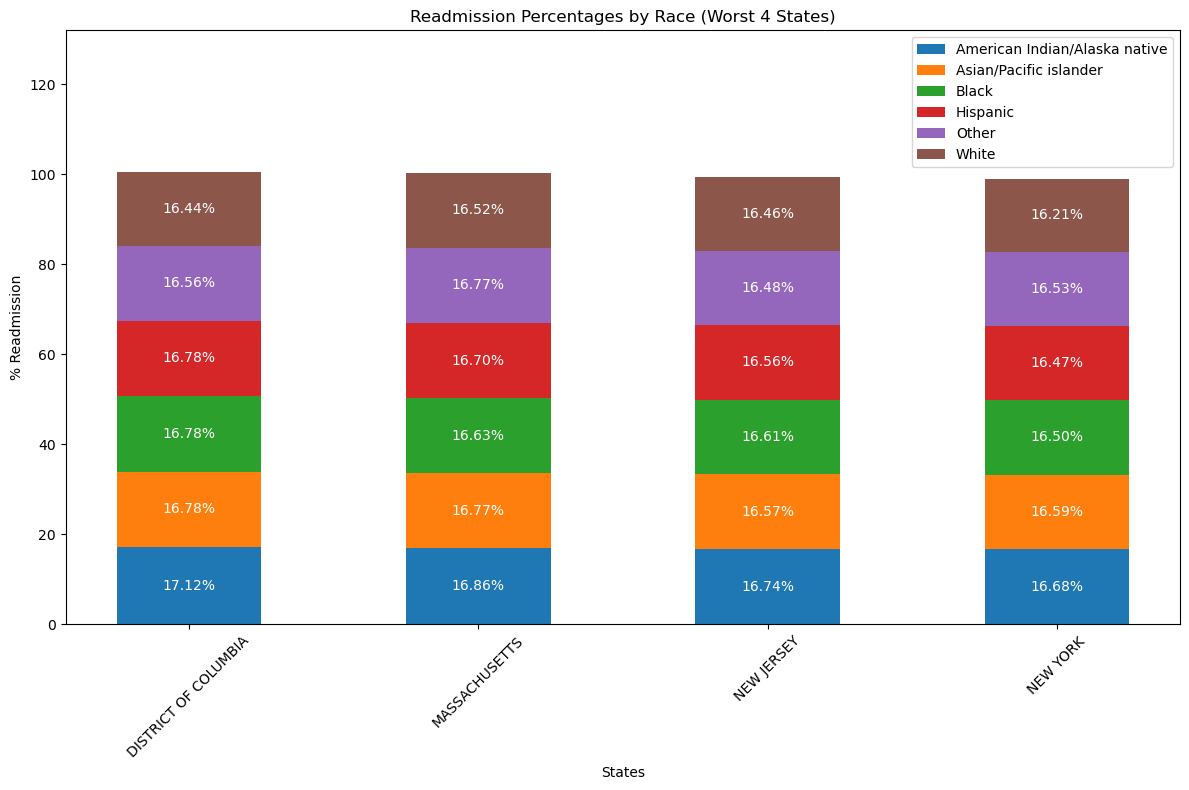

In [13]:
states = filtered_df2['state'].unique()
races = filtered_df2['Race'].unique()

# Group dataframe by state and race
grouped_df = filtered_df2.groupby(['state', 'Race']).mean().reset_index()

#create chart
plt.figure(figsize=(12, 8))

bar_width = 0.5
index = range(len(states))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
bottom = [0] * len(states)

# Plot each race for each state
for i, race in enumerate(races):
    race_data = grouped_df[grouped_df['Race'] == race]
    race_percentages = race_data['% Readmission']
    plt.bar(index, race_percentages, bar_width, label=race, color=colors[i], bottom=bottom)
    # Add labels within bars
    for j, percentage in enumerate(race_percentages):
        plt.text(index[j], bottom[j] + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
    bottom = [bottom[j] + percentage for j, percentage in enumerate(race_percentages)]

plt.xlabel('States')
plt.ylabel('% Readmission')
plt.title('Readmission Percentages by Race (Worst 4 States)')
plt.xticks(index, states)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.ylim(0, 132) 
plt.tight_layout()
plt.show()

In [14]:
#load in average readmissions data and read
state_census_clean_csv = Path("Output/Seleceted_States.csv")
state_census_clean = pd.read_csv(state_census_clean_csv)
state_census_clean

,State,Race,Total Household,<10k,10k to 15k,15k to 25k,25k to 35k,35k to 50k,50k to 75k,75k to 100k,100k to 150k,150k to 200k,200k+
0,Alaska,White alone,185456,6136,4307,9692,10808,17267,30886,25917,38157,19931,22355
1,Alaska,Black or African American alone,8458,380,211,541,715,895,2309,1105,1062,685,555
2,Alaska,American Indian and Alaska Native alone,28524,2363,1553,3627,2603,3395,5251,3148,3560,1636,1388
3,Alaska,Asian alone,12898,473,370,782,697,1137,2747,1980,2520,1387,805
4,Alaska,Native Hawaiian and Other Pacific Islander alone,2267,21,6,106,95,295,669,285,460,223,107
5,Alaska,Some Other Race alone,4239,206,152,264,270,645,731,632,885,291,163
6,Alaska,Hispanic or Latino (of any race),15760,664,441,920,1190,2387,3346,1985,2874,1022,931
7,District of Columbia,White alone,138443,4233,1294,2352,2965,4845,11908,14892,26509,20163,49282
8,District of Columbia,Black or African American alone,132384,17935,8850,11799,12113,13561,20097,15590,16105,7627,8707
9,District of Columbia,American Indian and Alaska Native alone,1198,116,195,59,43,74,424,95,87,20,85


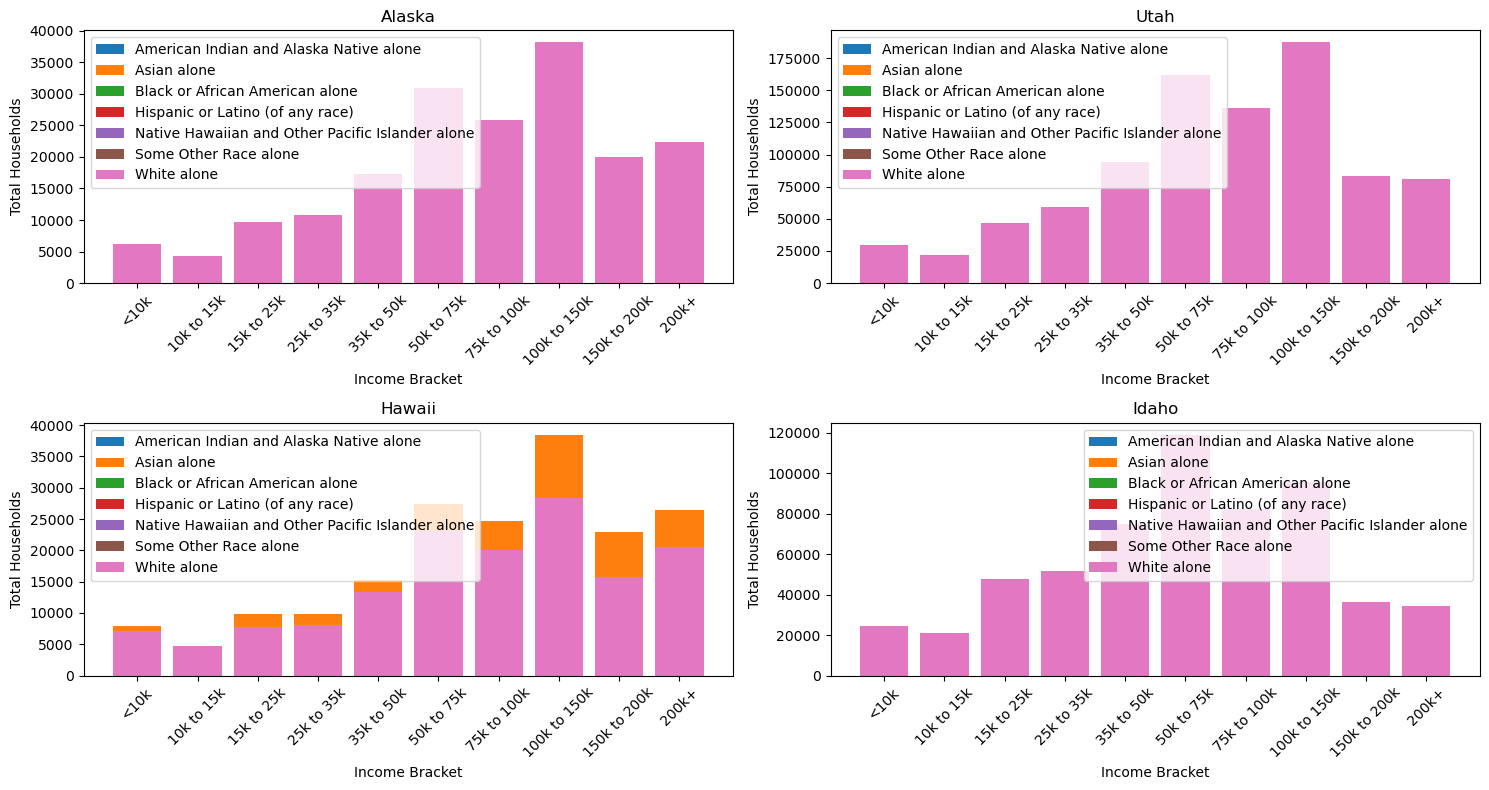

In [15]:
# Choose specific states to plot
states_to_plot = ["Alaska", "Utah", "Hawaii", "Idaho"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Group data by state and race
top_readmission_data = state_data.groupby(['State', 'Race'])

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Plot bar charts for the chosen states
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for (state, race), top_readmission_df in top_readmission_data:
    index = states_to_plot.index(state)
    ax = axes[index // num_cols, index % num_cols]
    
    # Calculate total households for each income bracket
    total_households = top_readmission_df[income_brackets].sum()
    
    # Plot bar chart
    ax.bar(income_brackets, total_households, label=race)
    ax.set_title(f"{state}")
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()


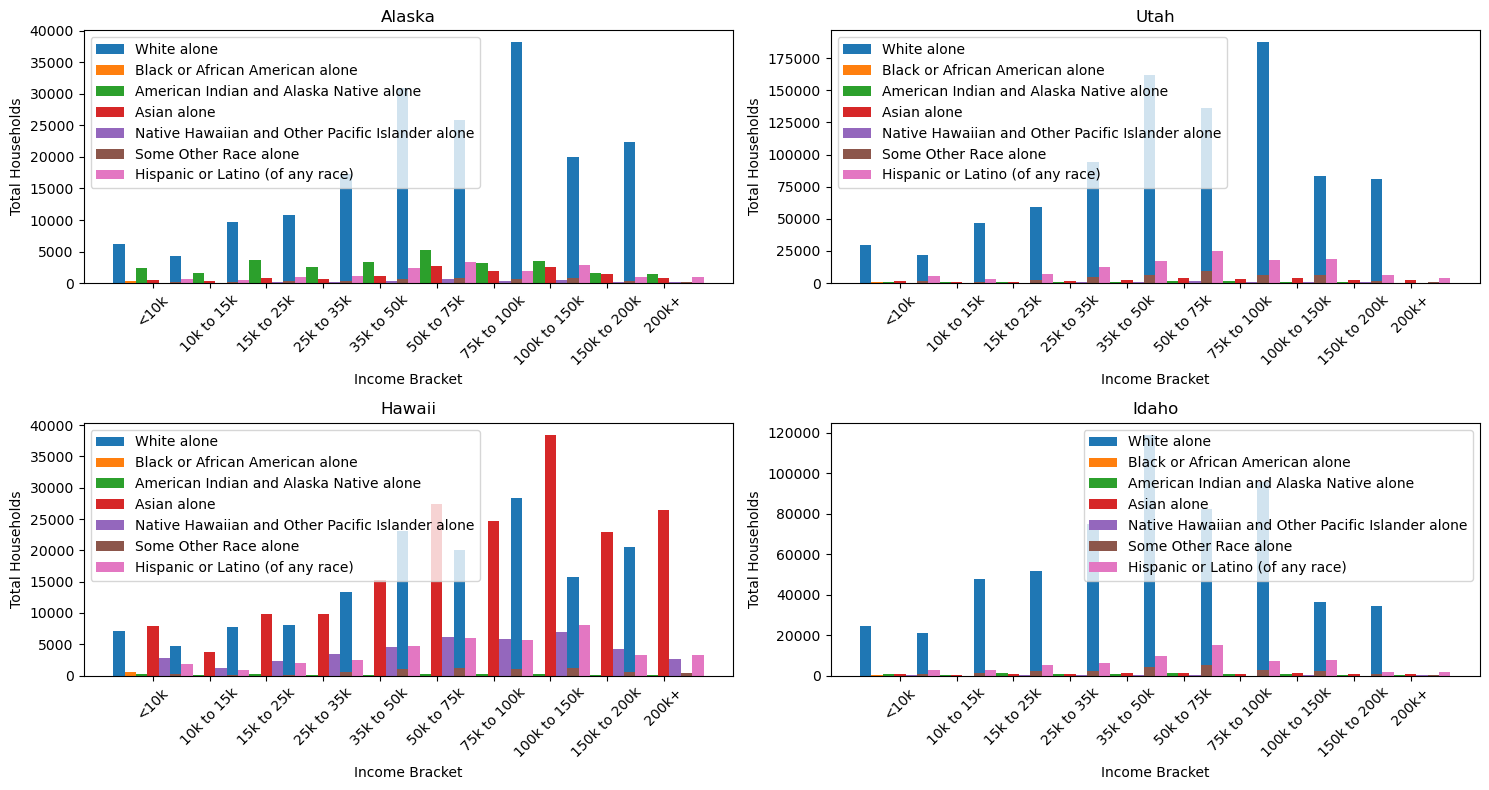

In [16]:
# Choose specific states to plot
states_to_plot = ["Alaska", "Utah", "Hawaii", "Idaho"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Create a dictionary to store data for each state
state_data_dict = {}
for state in states_to_plot:
    state_data_dict[state] = state_data[state_data['State'] == state].set_index('Race')[income_brackets].T.to_dict()

# Plot multi-bar graphs for each state
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, state in enumerate(states_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    races = list(state_data_dict[state].keys())
    num_races = len(races)
    bar_width = 0.2
    index = np.arange(len(income_brackets))
    
    for j, race in enumerate(races):
        bar_positions = index + j * bar_width - (bar_width * (num_races - 1) / 2)
        race_data = list(state_data_dict[state][race].values())
        ax.bar(bar_positions, race_data, bar_width, label=race)
    
    ax.set_title(state)
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.set_xticks(index)
    ax.set_xticklabels(income_brackets, rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()


In [17]:
state_data.describe()


,Total Household,<10k,10k to 15k,15k to 25k,25k to 35k,35k to 50k,50k to 75k,75k to 100k,100k to 150k,150k to 200k,200k+
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,88898.535714,3610.071429,2585.821429,5536.392857,6634.428571,10061.678571,16403.464286,12716.571429,16528.000000,7393.107143,7429.000000
std,197489.440400,7010.460380,5549.141249,12102.802358,14330.151480,21834.134141,36588.427095,29224.045509,38949.004951,17130.296526,17075.502515
min,820.000000,21.000000,6.000000,106.000000,95.000000,66.000000,82.000000,30.000000,100.000000,0.000000,30.000000
25%,7412.000000,361.250000,210.250000,471.750000,670.250000,945.250000,1435.500000,873.500000,1017.750000,499.500000,297.250000
50%,14329.000000,846.500000,587.000000,950.500000,1222.500000,2003.000000,3046.500000,1982.500000,2392.500000,982.000000,773.000000
75%,45945.000000,2865.500000,1882.500000,4006.250000,5354.500000,7099.750000,10648.750000,6568.750000,7804.000000,3496.250000,2915.250000
max,900902.000000,29520.000000,22079.000000,47800.000000,59465.000000,94126.000000,161737.000000,136413.000000,187202.000000,82928.000000,80975.000000


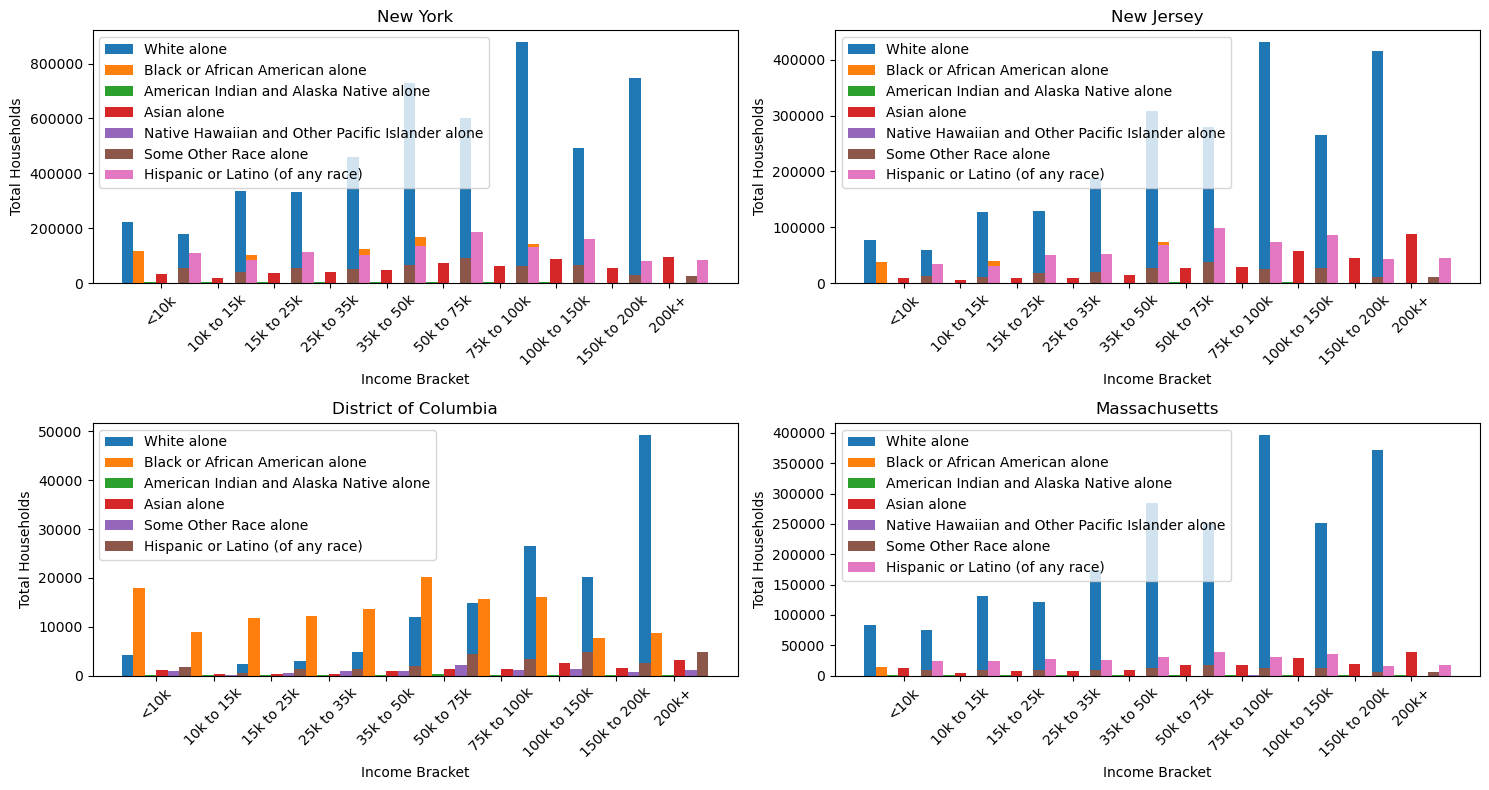

In [18]:
# Choose specific states to plot
states_to_plot = ["New York", "New Jersey", "District of Columbia", "Massachusetts"]

# Filter data for the chosen states
state_data = state_census_clean[state_census_clean['State'].isin(states_to_plot)]

# Get unique income brackets
income_brackets = state_census_clean.columns[3:]

# Create a dictionary to store data for each state
state_data_dict = {}
for state in states_to_plot:
    state_data_dict[state] = state_data[state_data['State'] == state].set_index('Race')[income_brackets].T.to_dict()

# Plot multi-bar graphs for each state
num_states = len(states_to_plot)
num_rows = 2
num_cols = (num_states + 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, state in enumerate(states_to_plot):
    ax = axes[i // num_cols, i % num_cols]
    races = list(state_data_dict[state].keys())
    num_races = len(races)
    bar_width = 0.2
    index = np.arange(len(income_brackets))
    
    for j, race in enumerate(races):
        bar_positions = index + j * bar_width - (bar_width * (num_races - 1) / 2)
        race_data = list(state_data_dict[state][race].values())
        ax.bar(bar_positions, race_data, bar_width, label=race)
    
    ax.set_title(state)
    ax.set_xlabel("Income Bracket")
    ax.set_ylabel("Total Households")
    ax.set_xticks(index)
    ax.set_xticklabels(income_brackets, rotation=45)
    ax.legend()

# Adjust layout

plt.tight_layout()
plt.show()
